In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

In [2]:
# Make data.
X = np.arange(-3, 3, 0.01)
Y = np.arange(-3, 3, 0.01)
X, Y = np.meshgrid(X, Y)
#https://en.wikipedia.org/wiki/Rosenbrock_function
Z = (1-X)**2 + 1 *(Y-X**2)**2

In [3]:
np.max(Z)

160.0

In [15]:
np.argmax?

In [16]:
num_func_params = 2
num_swarm = 10
position = -3 + 6 * np.random.rand(num_swarm, num_func_params)
velocity = np.zeros([num_swarm, num_func_params])
personal_best_position = np.copy(position)
personal_best_value = np.zeros(num_swarm)

In [17]:
for i in range(num_swarm):
    #Z = (1-X)**2 + 1 *(Y-X**2)**2
    personal_best_value[i] = (1-position[i][0])**2 + 1 *(position[i][1]-position[i][0]**2)**2


In [20]:
np.argmin(personal_best_value)

0

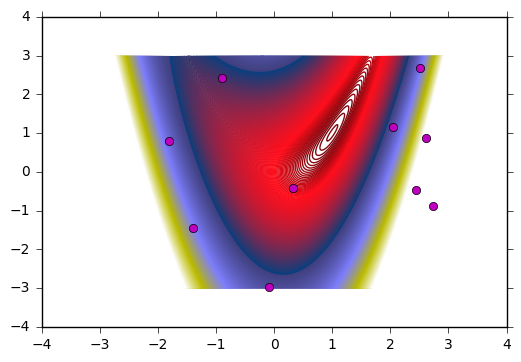

In [25]:
levels = np.linspace(-1, 35, 100)
CS = plt.contour(X, Y, Z, levels =levels, cmap=cm.gist_stern)
plt.gca().set_xlim([-4,4])
plt.gca().set_ylim([-4,4])

for i in range(num_swarm):
    plt.plot(position[i][0], position[i][1], 'mo')


In [6]:
t=1
global_best = np.min(personal_best_value)
global_best_position = np.copy(personal_best_position[np.argmin(personal_best_value)])


In [7]:
for i in range(num_swarm):
    #Z = (1-X)**2 + 1 *(Y-X**2)**2
    error = (1-position[i][0])**2 + 1 *(position[i][1]-position[i][0]**2)**2
    if personal_best_value[i] > error:
        personal_best_value[i] = error
        personal_best_position[i] = position[i]

In [8]:
best = np.min(personal_best_value)
best_index = np.argmin(personal_best_value)
if global_best > best:
    global_best = best
    global_best_position = np.copy(personal_best_position[best_index])


In [9]:
c1 = 0.1
c2 = 0.2
for i in range(num_swarm):
    #update velocity
    velocity[i] += c1 * np.random.rand() * (personal_best_position[i]-position[i]) \
                +  c2 * np.random.rand() * (global_best_position - position[i])
    position[i] += velocity[i]
 

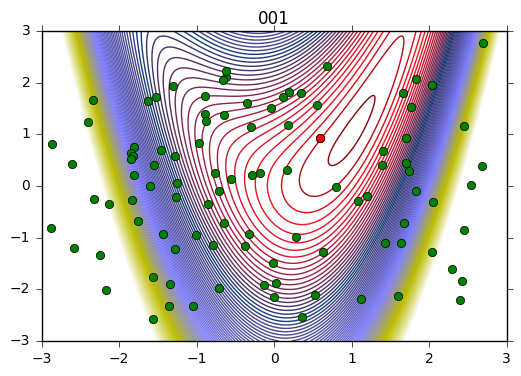

In [10]:
levels = np.linspace(-1, 35, 100)
CS = plt.contour(X, Y, Z, levels =levels, cmap=cm.gist_stern)
plt.gca().set_xlim([-3,3])
plt.gca().set_ylim([-3,3])

for i in range(num_swarm):
    plt.plot(position[i][0], position[i][1], 'go')
plt.plot(global_best_position[0], global_best_position[1], 'ro')
plt.title('{0:03d}'.format(t))

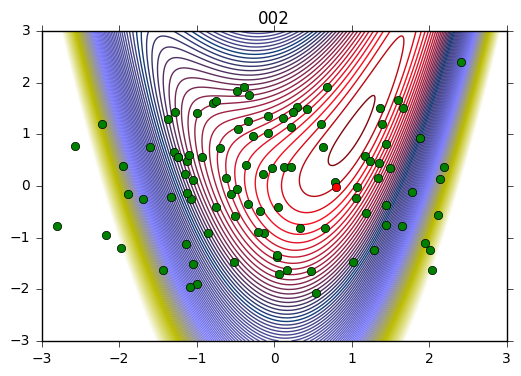

In [11]:
t=2
for i in range(num_swarm):
    error = (1-position[i][0])**2 + 1 *(position[i][1]-position[i][0]**2)**2
    if personal_best_value[i] > error:
        personal_best_value[i] = error
        personal_best_position[i] = position[i]
best = np.min(personal_best_value)
best_index = np.argmin(personal_best_value)
if global_best > best:
    global_best = best
    global_best_position = np.copy(personal_best_position[best_index])
    
for i in range(num_swarm):
    #update velocity
    velocity[i] += c1 * np.random.rand() * (personal_best_position[i]-position[i]) \
                +  c2 * np.random.rand() * (global_best_position - position[i])
    position[i] += velocity[i]
    
fig = plt.figure()
CS = plt.contour(X, Y, Z, levels =levels, cmap=cm.gist_stern)
plt.gca().set_xlim([-3,3])
plt.gca().set_ylim([-3,3])
for i in range(num_swarm):
    plt.plot(position[i][0], position[i][1], 'go')
plt.plot(global_best_position[0], global_best_position[1], 'ro')
    
plt.title('{0:03d}'.format(t))